# Multiple_Linear_Regression_Bike_Sharing_Assignment

## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
The company is finding it very difficult to sustain in the current market scenario. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

## Goal:
Build a model for the demand for shared bikes with the available independent variables. It will be used to understand how exactly the demands vary with different features, and accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way to understand the demand dynamics of a new market. 

### Import libraries and assess imported data

In [470]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [471]:
bikesharing = pd.read_csv("day.csv")

In [472]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [473]:
bikesharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [474]:
bikesharing.shape

(730, 16)

In [475]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [476]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Clean-up data and drop columns which are not useful

In [478]:
# Droping instant column as it is index column
bikesharing.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we already have month and weekday columns
bikesharing.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered column as as we have cnt column which is sum of the both
bikesharing.drop(['casual'], axis = 1, inplace = True)
bikesharing.drop(['registered'], axis = 1, inplace = True)

In [479]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [480]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Check for missing values

In [482]:
bikesharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### inference - there are no null/missing values

### Check for correlations

In [485]:
bikesharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


### Check for outliers for all fields which are dependent on weather

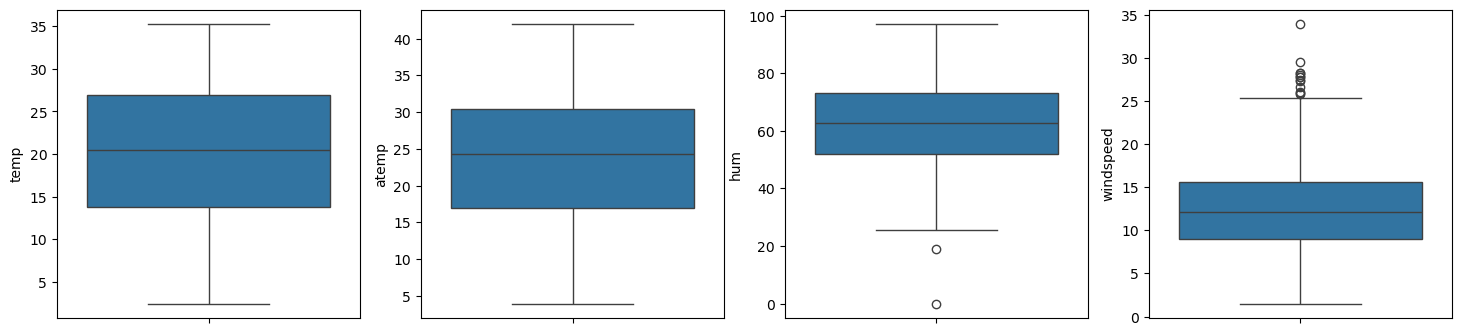

In [487]:
# Draw box plots 
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikesharing)
    i+=1

#### Inference - none of the fields hae any outliers which need to be handled

# Exploratory Data Analysis

### Following columns need to be changed to Categorical type 
### season,	mnth, weekday, weathersit

In [491]:
bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

bikesharing.weathersit.replace({1:'clear', 2:'mist', 3:'rain', 4:'thunderstorm'}, inplace = True)

bikesharing.mnth = bikesharing.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                                             7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

bikesharing.weekday = bikesharing.weekday.replace({0: 'tue', 1: 'wed', 2: 'thu', 3: 'fri', 4: 'sat', 5: 'sun', 6: 'mon'})


In [492]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Check the linear relationship between variabes using pairplot

<Figure size 1500x3000 with 0 Axes>

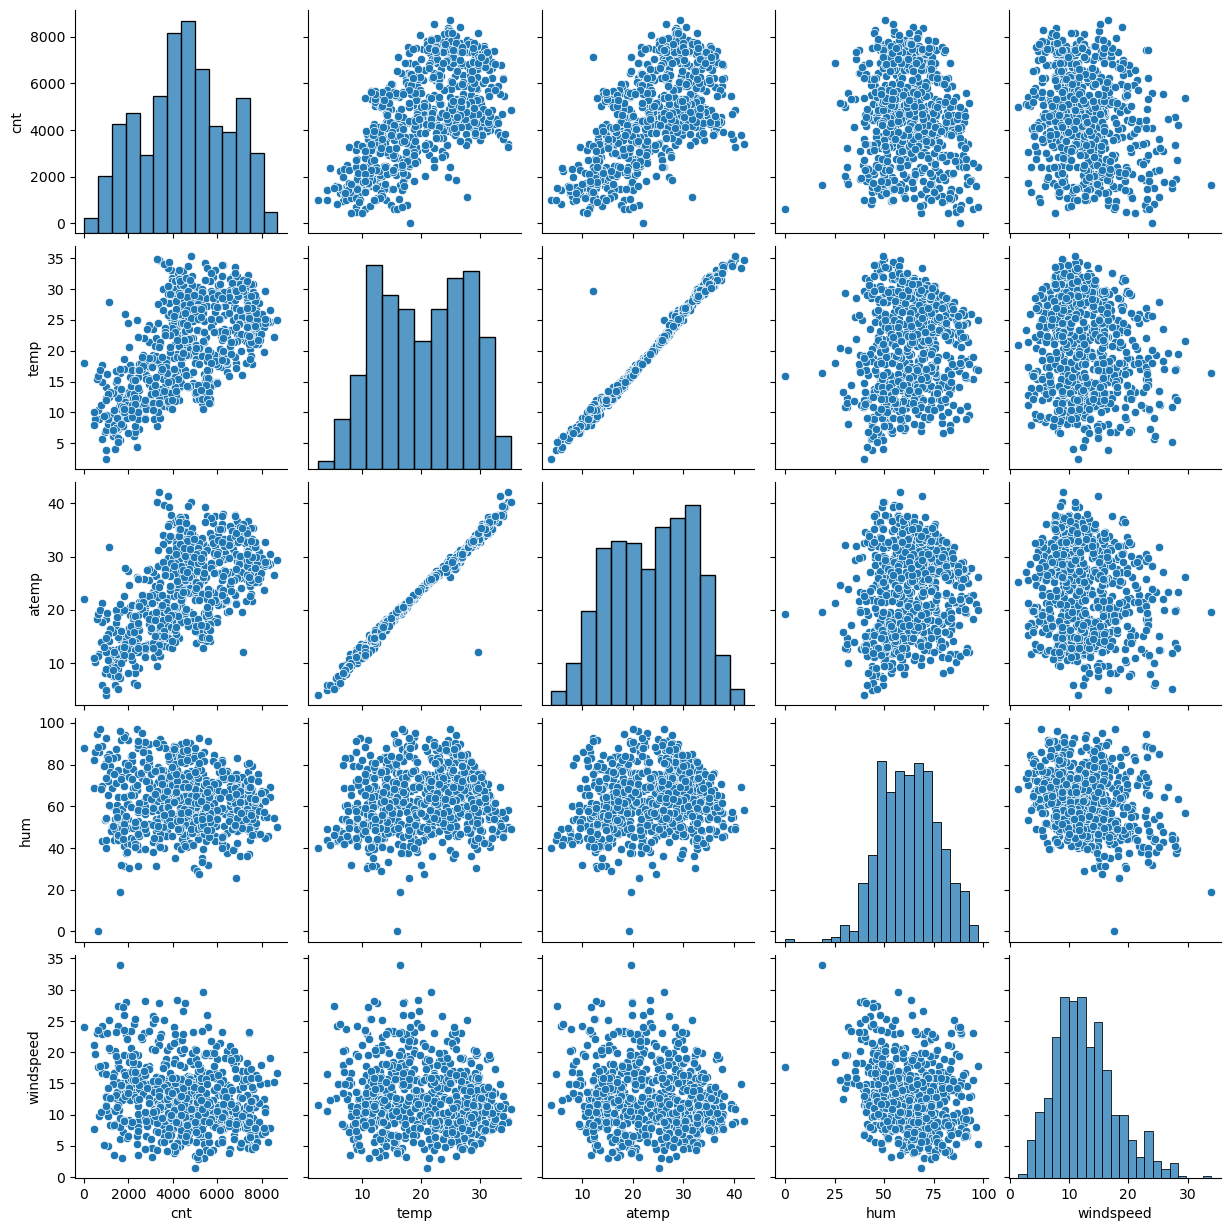

In [494]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikesharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Check correlation through heatmap

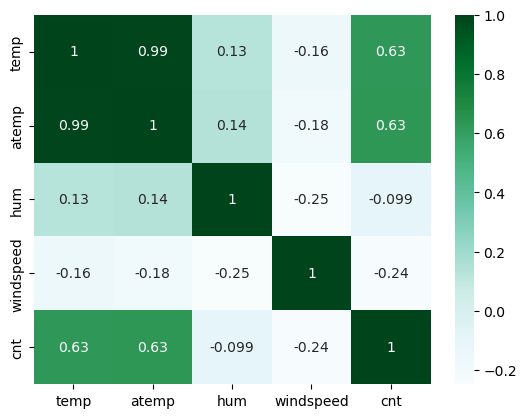

In [496]:
sns.heatmap(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Inference
1. temp and atemp are highly correlated at 0.99
2. strong correlation between cnt and temp
3. windspeed has a negatve correlation with cnt, means higher the windspeed lower the bike rentals 

## Analysing Categorical Variables

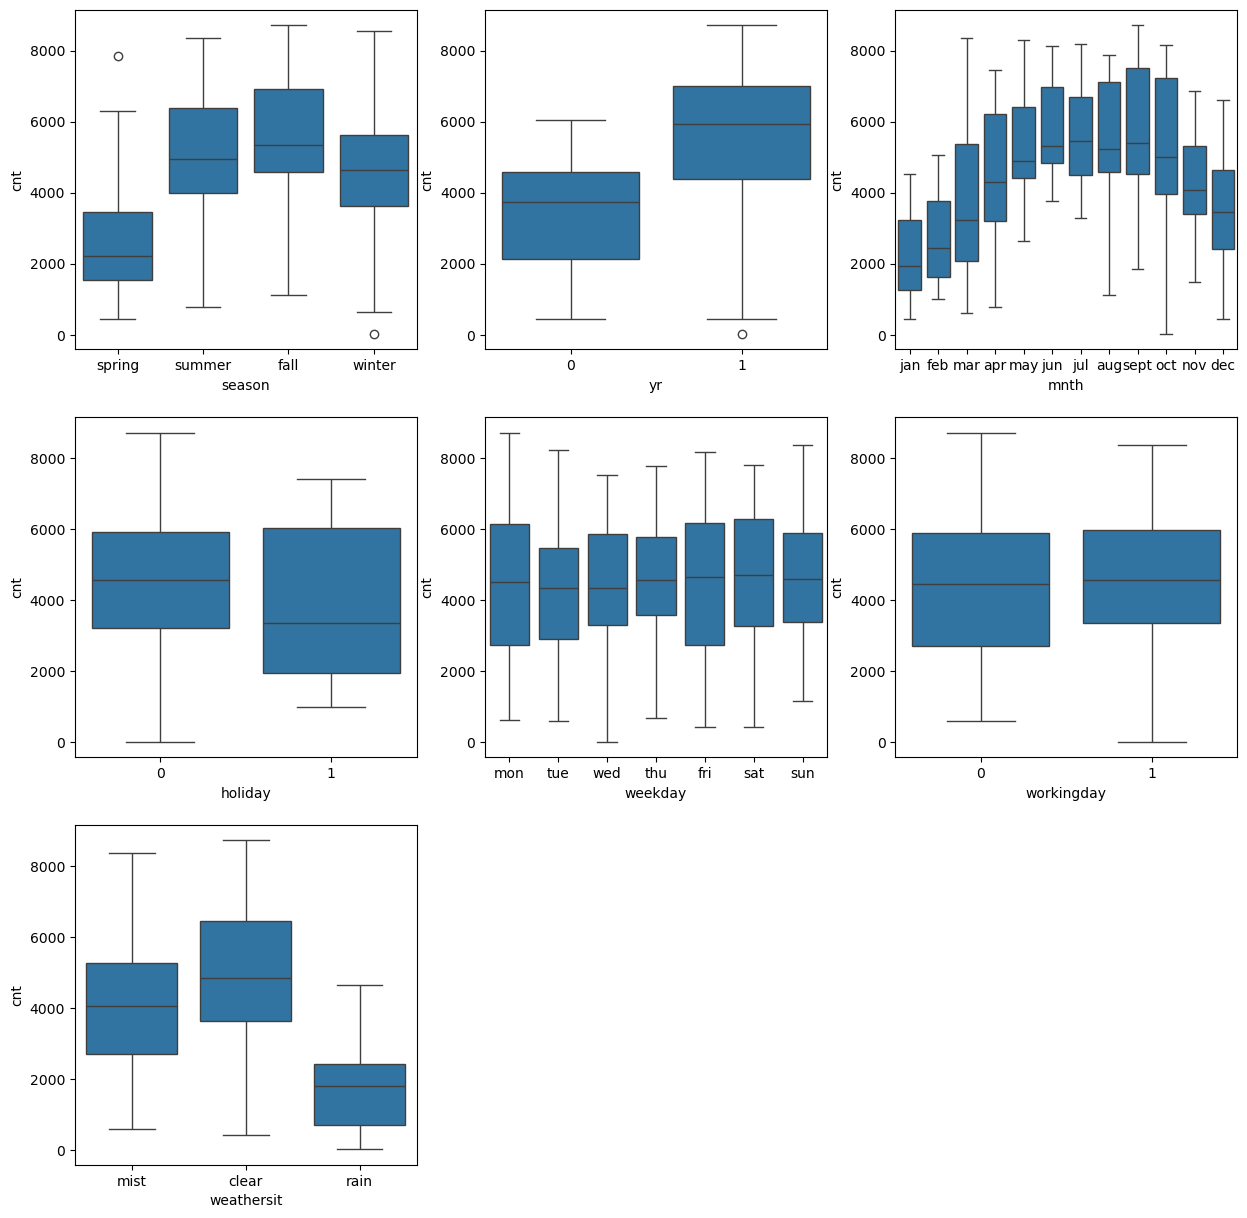

In [499]:
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing, x=i[1], y='cnt')
plt.show()

#### Inferences
1. No outliers are seen in any box plot.
2. Season 3 (fall) has the highest demand of rental bikes,
3. Demand has grown significantly for year 1 (2019) compared to year 0 (2018).
4. September month has the highest demand. 
5. Overall the consecutive months of aug-sep-oct see the maximum demand, with a fall in dec-jan-feb for minimum demand.
6. Interestingly on holidays, there is less demand of bike rentals.
7. The clear weather has the highest demand.

# Data Preparation for Linear Regression

#### Create dummy variables for categorical variables

In [503]:
bikesharing = pd.get_dummies(data=bikesharing, columns=["season", "mnth", "weekday", "weathersit"], dtype= int, drop_first=True)

In [504]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

## Split data into training set and test set

In [507]:
bikesharing.shape

(730, 30)

In [508]:
# y - contains only target variable
y = bikesharing.pop('cnt')

# X - all remainign variable also our independent variables
X = bikesharing

# Train and Test split into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [509]:
## check the independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [510]:
# Checking shape and size for train and test
print (X_train.shape)
print (X_test.shape)

(511, 29)
(219, 29)


## Feature Scaling of continuous variables

### Following continous columns are to be scaled using MinMaxScaler
### temp, atemp, hum, windspeed

In [513]:
from sklearn.preprocessing import MinMaxScaler
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [514]:
#Inspect the stats from training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_rain
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.09002,0.150685,0.146771,0.129159,0.131115,0.152642,0.148728,0.346380,0.029354
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.28649,0.358092,0.354224,0.335704,0.337857,0.359994,0.356169,0.476282,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [515]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_rain
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,1,0,0,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,1,0,0,0,0,0,0,1,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,1,0,0,0,0,0,0,0,1,0


## Build a Model using RFE approach to eliminate some columns

In [517]:
# Build a Lienar Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [518]:
#RFE for 15 features
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [519]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 11),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 10),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 15),
 ('weathersit_mist', True, 1),
 ('weathersit_rain', True, 1)]

## Manual elimination

##### Function to build a model with paramater of columns

In [522]:
# Function to build a model

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [523]:
# Function to calculate VIFs and display

def cal_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [524]:
# Print Columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_mon', 'weathersit_mist', 'weathersit_rain'],
      dtype='object')

In [525]:
# Take 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_mon', 'weathersit_mist', 'weathersit_rain']]

In [526]:
X_train_rfe.shape

(511, 15)

In [527]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_mist', 'weathersit_rain'],
      dtype='object')

## Model 1 - all columns selected by RFE

In [529]:
cols = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_mon', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.72e-185
Time:                        17:31:42   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3160.8168    306.560     

## Model 2 - Drop variable "temp" as it has high p-value

In [531]:
cols = ['yr', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_mon', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.16e-186
Time:                        17:31:42   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3159.4515    305.899     

## Model 3 - Drop variable "weekday_mon" as it has high p-value

In [533]:
cols = ['yr', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.61e-187
Time:                        17:31:42   Log-Likelihood:                -4127.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3197.2392    305.199     

## Model 4 - Remove season_spring as it is highly correlated with July

In [535]:
cols = ['yr', 'atemp', 'hum', 'windspeed',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.09e-170
Time:                        17:31:42   Log-Likelihood:                -4168.7
No. Observations:                 511   AIC:                             8363.
Df Residuals:                     498   BIC:                             8418.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1696.9537    280.441     

## Model 5 - Replace windspeed with season_spring as windspeed are highly correlated

In [537]:
cols = ['yr', 'atemp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.53e-184
Time:                        17:31:42   Log-Likelihood:                -4137.7
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8357.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2431.8494    257.001     

## Model 6 - Remove atemp as it was highly correlated with temp

In [590]:
cols = ['yr', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.23e-153
Time:                        17:35:57   Log-Likelihood:                -4212.5
No. Observations:                 511   AIC:                             8449.
Df Residuals:                     499   BIC:                             8500.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4421.8928    238.782     

## Model 7 - Remove hum as it has very high p value

In [593]:
cols = ['yr', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.66e-154
Time:                        19:04:39   Log-Likelihood:                -4212.5
No. Observations:                 511   AIC:                             8447.
Df Residuals:                     500   BIC:                             8494.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4427.5266     85.477     

## Model 8 - Remove mnth_jul because of high p value

In [597]:
cols = ['yr', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.05e-155
Time:                        19:05:32   Log-Likelihood:                -4214.0
No. Observations:                 511   AIC:                             8448.
Df Residuals:                     501   BIC:                             8490.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4481.4472     79.653     

## Model 9 - Remove season_winter because of high p value

In [599]:
cols = ['yr', 'season_spring',
       'mnth_dec', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.59e-155
Time:                        19:06:04   Log-Likelihood:                -4216.0
No. Observations:                 511   AIC:                             8450.
Df Residuals:                     502   BIC:                             8488.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4524.2334     77.049     

## Model 10 - Remove mnth_mar because of high p value 

In [603]:
cols = ['yr', 'season_spring',
       'mnth_dec', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

build_model(cols)

cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     238.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.66e-155
Time:                        19:06:40   Log-Likelihood:                -4218.9
No. Observations:                 511   AIC:                             8454.
Df Residuals:                     503   BIC:                             8488.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4535.7359     77.252     

## Inference from above models

### Model 10 is the final model. VIF values are in accepted values range for all the parameters.
### p-value for all features is within accepted range and R2 is 0.768, adjusted R2 is 0.765.
### Difference between R-squared and Adjusted R-squared values for this model is very less, 
### which means that there are no additional parameters that needs to be removed.

## Build a model with all columns to select features automatically

In [618]:
def build_model_new(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [620]:
#Building final model using sklearn

cols = ['yr', 'season_spring',
       'mnth_dec', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

#Building a model with above columns
lr = build_model_new(X_train[cols],y_train)

print(lr.intercept_,lr.coef_)

4535.735860924225 [ 2049.07614211 -2686.67766656  -815.00586828 -1042.69948619
   642.5944025   -736.78515525 -2560.03901797]


## Model Verification

### Residual Analysis

In [625]:
y_train_pred = lr.predict(X_train[cols])

#### Plot a histogram for error terms

In [629]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

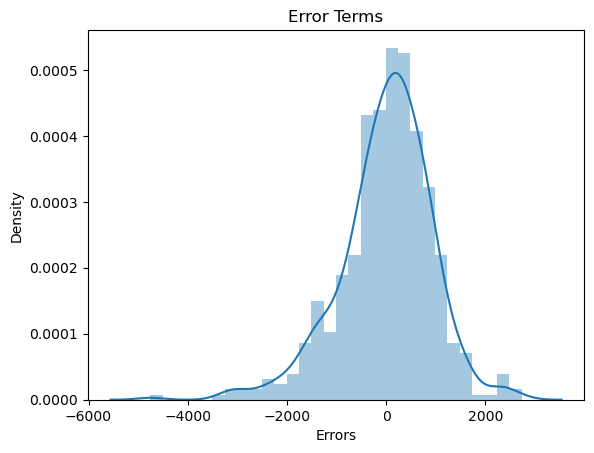

In [631]:
plot_res_dist(y_train, y_train_pred)

#### Inference - Errors are normally distribured with mean 0

# Actual vs Predicted

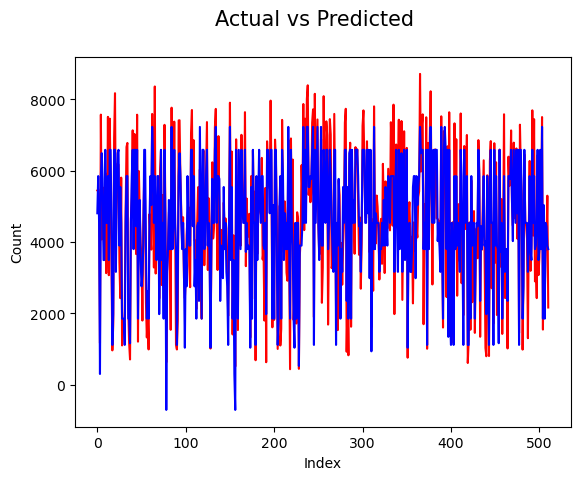

In [642]:
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train, color="red")
plt.plot(c, y_train_pred, color="blue")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

#### Print R-squared Value

In [640]:
r2_score(y_train,y_train_pred)

0.7684191734221332

#### Inferences 
#### Actual vs Predicted values are almost similar
#### R^2 for test model is same as training model

### Predict values for test data set

In [647]:
# Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

# Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [650]:
#Columns from our final model
cols = ['yr', 'season_spring',
       'mnth_dec', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

##### Predict the values for test data

In [652]:
y_test_pred = lr.predict(X_test[cols])

#### R-Squared value for test predictions

In [655]:
# R squared value between test and predicted test data sets.  
r2_score(y_test, y_test_pred)

0.7293877195952114

In [657]:
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+ dataname, fontsize=20)              
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)  

### Plot Error Terms for test data

Text(0, 0.5, 'Counts - Predicted Counts')

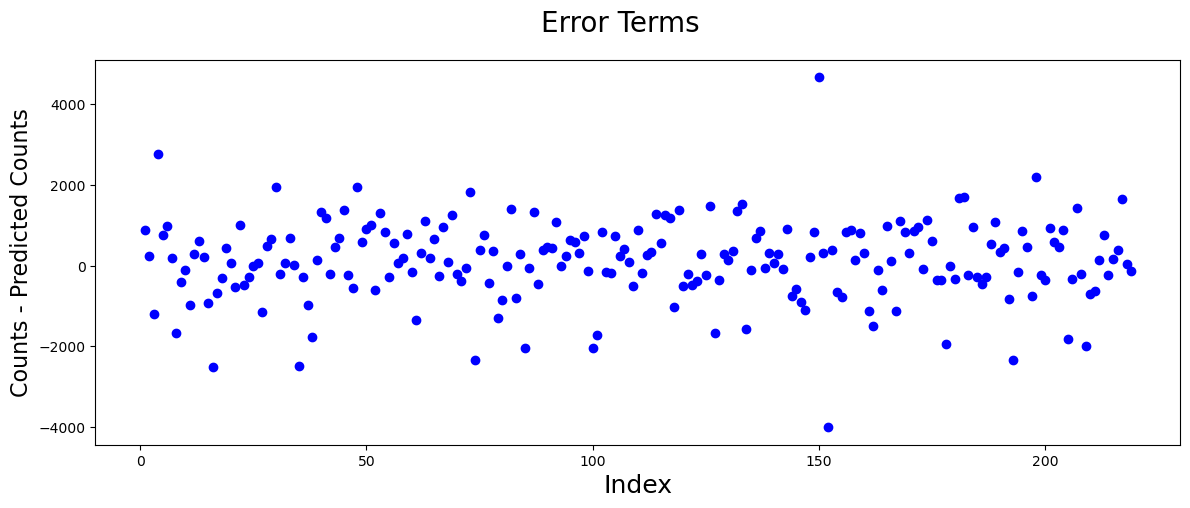

In [660]:
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c, y_test-y_test_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('Counts - Predicted Counts', fontsize=16)  

### Inference

#### Error terms are randomly distributed and there is no pattern which means the output is explained well by the model.

# Interpreting the finalmodel

In [667]:
cols = ['yr', 'season_spring',
       'mnth_dec', 'mnth_nov',
       'mnth_sept', 'weathersit_mist', 'weathersit_rain']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     238.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.66e-155
Time:                        19:25:19   Log-Likelihood:                -4218.9
No. Observations:                 511   AIC:                             8454.
Df Residuals:                     503   BIC:                             8488.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4535.7359     77.252     

# The equation of our best fitted line is:

## cnt = 4535.7359 + (2049.0761 \times  yr)  - (2686.6777 \times season_spring) - (815.0059  \times mnth_dec) - (1042.6995 \times month_nov) + (642.5944 \times mnth_sept) - (736.7852 \times weathersit_mist) - (2560.0390 \times weathersit_rain)

## Important predictor variables are as follows:
### 1) yr
### 2) season_spring
### 3) mnth_dec
### 4) mnth_nov
### 5) mnth_sep
### 6) mist weather
### 7) rain weather

### The company should keep in mind the above predictor variables for bike rental strategy.